In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import Ames Housing dataset save as housing
housing = pd.read_csv('AmesHousing.csv')

# view columns and first five rows
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# total instances, counts in each column, and data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
# check the summary of the numerical attributes
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
# create new dataframe with variables using in analysis

housing_new = housing[['Lot Area', 'Neighborhood', 'Overall Qual',
                     'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'SalePrice']]
housing_new.head()

,Lot Area,Neighborhood,Overall Qual,Full Bath,Half Bath,TotRms AbvGrd,SalePrice
0,31770,NAmes,6,1,0,7,215000
1,11622,NAmes,5,1,0,5,105000
2,14267,NAmes,6,1,1,6,172000
3,11160,NAmes,7,2,1,8,244000
4,13830,Gilbert,5,2,1,6,189900


In [7]:
# check for Na's 
housing_new.isna().sum()

Lot Area         0
Neighborhood     0
Overall Qual     0
Full Bath        0
Half Bath        0
TotRms AbvGrd    0
SalePrice        0
dtype: int64

In [8]:
# check summary statistics
housing_new.describe()

,Lot Area,Overall Qual,Full Bath,Half Bath,TotRms AbvGrd,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,10147.921843,6.094881,1.566553,0.379522,6.443003,180796.060068
std,7880.017759,1.411026,0.552941,0.502629,1.572964,79886.692357
min,1300.000000,1.000000,0.000000,0.000000,2.000000,12789.000000
25%,7440.250000,5.000000,1.000000,0.000000,5.000000,129500.000000
50%,9436.500000,6.000000,2.000000,0.000000,6.000000,160000.000000
75%,11555.250000,7.000000,2.000000,1.000000,7.000000,213500.000000
max,215245.000000,10.000000,4.000000,2.000000,15.000000,755000.000000


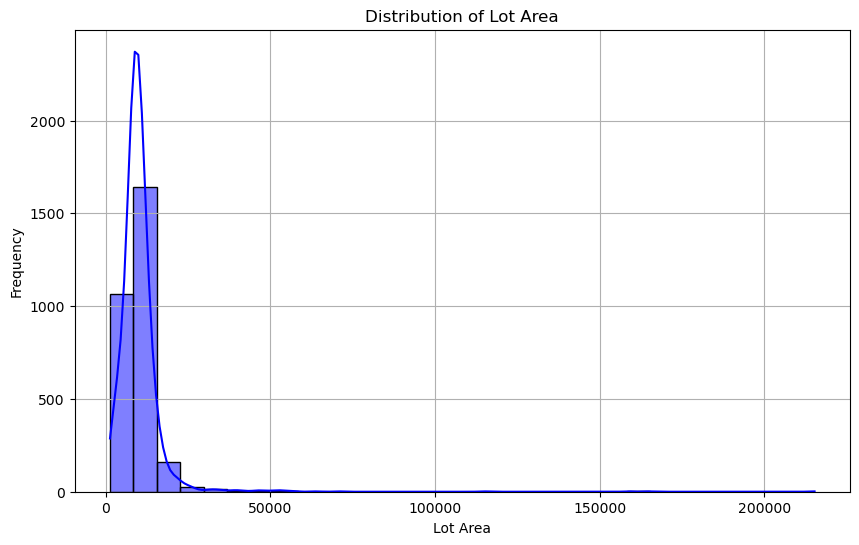

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_new['Lot Area'], kde=True, bins=30, color='blue')
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

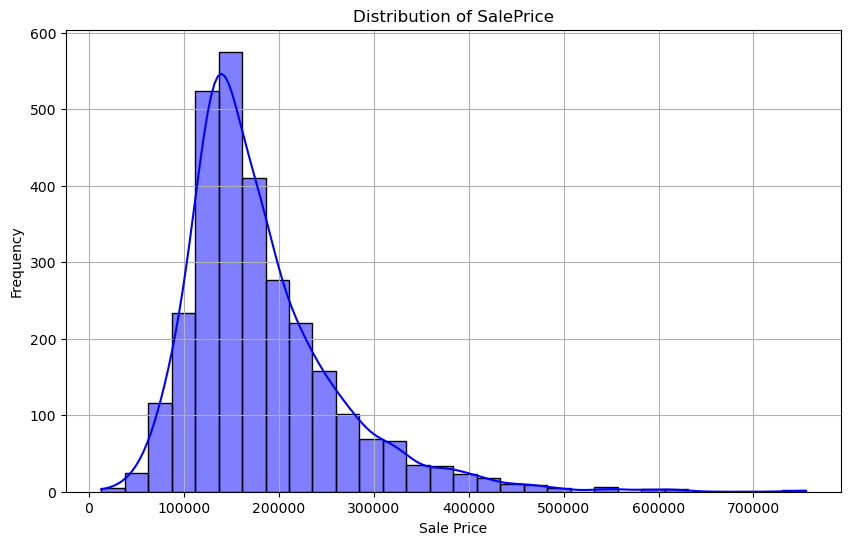

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_new['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
# Remove Lot Area outliers

Q1 = housing_new['Lot Area'].quantile(0.2)
Q3 = housing_new['Lot Area'].quantile(0.8)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

housing_new = housing_new[(housing_new['Lot Area'] >= lower_bound) & (housing_new['Lot Area'] <= upper_bound)]

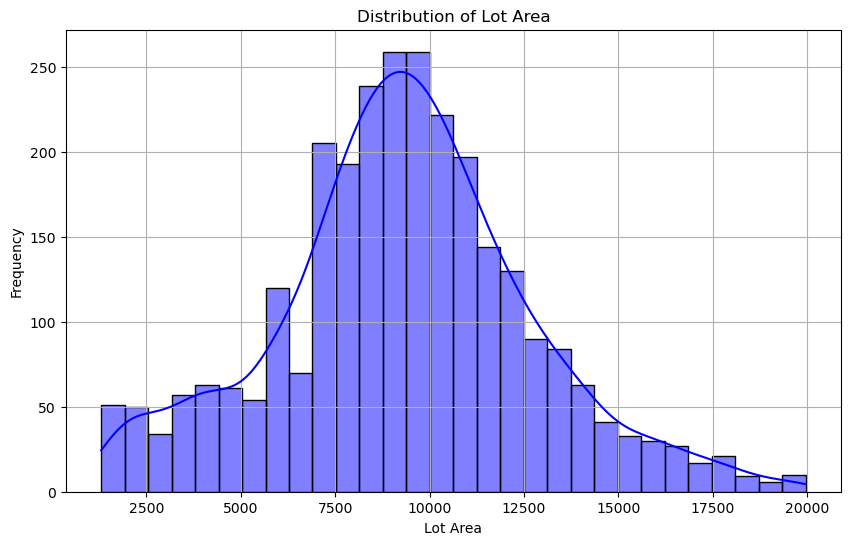

In [12]:
# look at Lot Area distribution

plt.figure(figsize=(10, 6))
sns.histplot(housing_new['Lot Area'], kde=True, bins=30, color='blue')
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
# Remove Sale Price 3sd outliers

mean_saleprice = housing_new['SalePrice'].mean()
std_saleprice = housing_new['SalePrice'].std()

# Calculate upper and lower bounds for outlier detection
lower_boundb = mean_saleprice - 3 * std_saleprice
upper_boundb = mean_saleprice + 3 * std_saleprice

# Remove outliers
housing_cleaned = housing_new[(housing_new['SalePrice'] >= lower_boundb) & 
                                      (housing_new['SalePrice'] <= upper_boundb)]

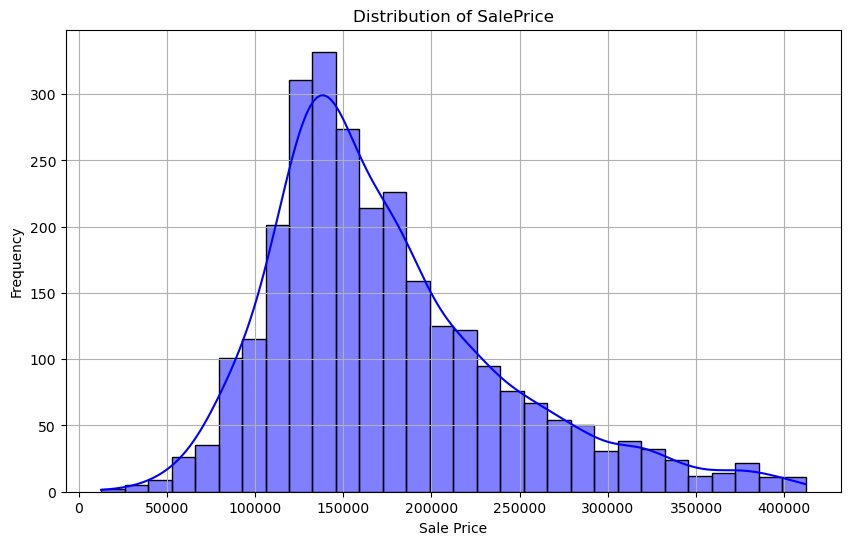

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_cleaned['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
# Check Correlations
numerical_columns = ['Lot Area', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'SalePrice']

num_corr = housing_cleaned[numerical_columns].corr()
num_corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
Overall Qual     0.813905
Full Bath        0.568305
TotRms AbvGrd    0.466781
Lot Area         0.377072
Half Bath        0.277132
Name: SalePrice, dtype: float64

In [16]:
# combine attributes full bath and half bath to see correlation with one bathroom attribute

housing_cleaned['Total Bath'] = housing_cleaned['Full Bath'] + (housing_cleaned['Half Bath']/2)

numerical_columns2 = ['Lot Area', 'Overall Qual', 'Full Bath', 'Half Bath', 'Total Bath', 'TotRms AbvGrd', 'SalePrice']

num_corr2 = housing_cleaned[numerical_columns2].corr()
num_corr2['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
Overall Qual     0.813905
Total Bath       0.598327
Full Bath        0.568305
TotRms AbvGrd    0.466781
Lot Area         0.377072
Half Bath        0.277132
Name: SalePrice, dtype: float64

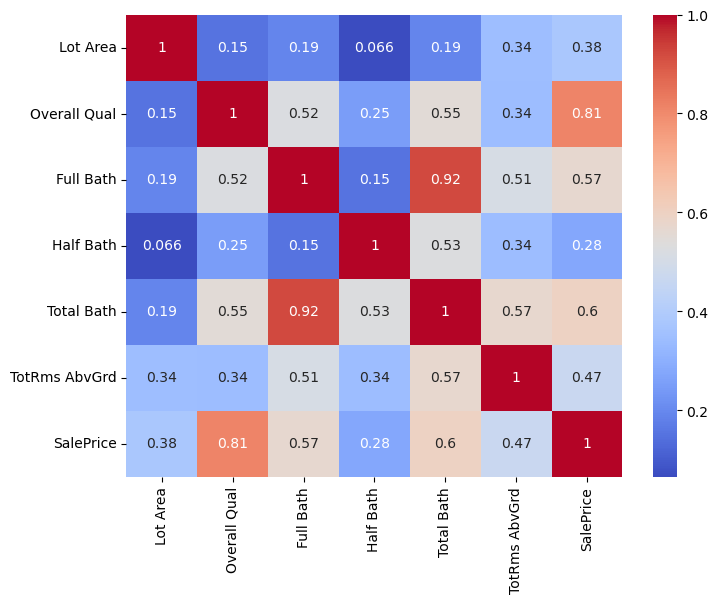

In [17]:
# Heat map 

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))  # Optional: set the figure size
sns.heatmap(num_corr2, annot=True, cmap='coolwarm')  # 'annot=True' shows values on the heatmap

# Display the heatmap
plt.show()

In [18]:
# cat variables list
cat_cols = ['Neighborhood']

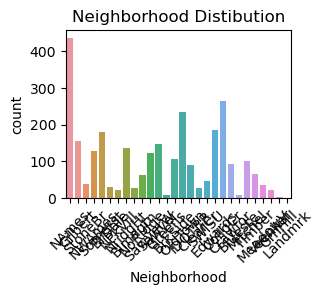

In [19]:
# Loop through each categorical variable and plot frequency distribution clean up

for i, column in enumerate(housing_new[cat_cols], 1):
    plt.subplot(2, 2, i)
    sns.countplot(data = housing_cleaned, x = column)
    plt.title(f'{column} Distibution')
    plt.xticks(rotation = 45)
    
plt.tight_layout
plt.show()

In [20]:
housing_cleaned.groupby('Neighborhood')['SalePrice'].agg(['count','mean', 'median']).sort_values(by = 'mean', ascending = False)

,count,mean,median
Neighborhood,,,
NoRidge,63,304708.857143,291000.0
NridgHt,138,290431.108696,290470.5
GrnHill,2,280000.000000,280000.0
StoneBr,40,275110.100000,265000.0
Veenker,22,246570.454545,250250.0
Timber,65,242980.815385,231713.0
Somerst,179,226238.703911,225000.0
Crawfor,94,206953.319149,198750.0
CollgCr,264,199889.193182,200000.0


In [21]:
# Drop total bath, will create in custom transformer 

housing_cleaned = housing_cleaned.drop('Total Bath', axis = 1)

In [22]:
# multicollinearity

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(housing_cleaned[numerical_columns].values, i) for i in range(housing_new[numerical_columns].shape[1])]
vif["features"] = housing_cleaned[numerical_columns].columns
print(vif)

   VIF Factor       features
0    9.927952       Lot Area
1   33.191987   Overall Qual
2   16.012973      Full Bath
3    1.798575      Half Bath
4   24.717231  TotRms AbvGrd
5   22.452184      SalePrice


## Begin ML 

In [23]:
# split into training and test sets

X = housing_cleaned.drop('SalePrice', axis = 1)
y = housing_cleaned['SalePrice']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.head()

,Lot Area,Neighborhood,Overall Qual,Full Bath,Half Bath,TotRms AbvGrd
161,8064,NAmes,6,1,0,5
1737,8499,Gilbert,6,2,1,6
1909,9480,NAmes,5,1,1,7
906,4500,SWISU,5,1,0,6
245,11980,SawyerW,7,1,1,4


In [25]:
y_train.head()

161     132000
1737    156932
1909    146500
906     159434
245     270000
Name: SalePrice, dtype: int64

In [26]:
# Create Combined Attribute custom transformer

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, full_bath_col, half_bath_col):
        self.full_bath_col = full_bath_col
        self.half_bath_col = half_bath_col
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Handling DataFrame input
        if isinstance(X, pd.DataFrame):
            X = X.copy()
            total_baths = X[self.full_bath_col] + (X[self.half_bath_col] / 2)
            X = X.drop([self.full_bath_col, self.half_bath_col], axis=1)
            return pd.concat([X, total_baths.rename('total_baths')], axis=1)
        
        # Handling ndarray input
        elif isinstance(X, np.ndarray):
            # Get the column indices for the full and half baths
            full_bath_index = self.full_bath_col
            half_bath_index = self.half_bath_col

            # Calculate total baths
            total_baths = X[:, full_bath_index] + (X[:, half_bath_index] / 2)
            # Delete the original bath columns
            X = np.delete(X, [full_bath_index, half_bath_index], axis=1)
            # Stack the total baths
            return np.column_stack([X, total_baths])
        
        else:
            raise ValueError("Error")

In [27]:
# Verify 

attribs_adder = CombinedAttributeAdder(full_bath_col= 'Full Bath', half_bath_col = 'Half Bath')

X_train_test = attribs_adder.fit_transform(X_train)

X_train_test.head()

,Lot Area,Neighborhood,Overall Qual,TotRms AbvGrd,total_baths
161,8064,NAmes,6,5,1.0
1737,8499,Gilbert,6,6,2.5
1909,9480,NAmes,5,7,1.5
906,4500,SWISU,5,6,1.0
245,11980,SawyerW,7,4,1.5


In [28]:
housing_num = X_train.select_dtypes(include=[np.number])  # Numerical columns
cat_attribs = X_train.select_dtypes(exclude=[np.number]).columns 

In [29]:
# Make numerical pipeline

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    CombinedAttributeAdder(full_bath_col=housing_num.columns.get_loc('Full Bath'),
                           half_bath_col=housing_num.columns.get_loc('Half Bath')),
    StandardScaler()
)

In [30]:
# Creating the ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, housing_num.columns),
    ("cat", OneHotEncoder(drop='first', handle_unknown = 'ignore'), cat_attribs),
], remainder='drop')

In [31]:
lin_reg = make_pipeline(preprocessing, LinearRegression())

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('combinedattributeadder',
                                                                   CombinedAttributeAdder(full_bath_col=2,
                                                                                          half_bath_col=3)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Lot Area', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Neighborhood'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [32]:
# predictions

X_train_pred = lin_reg.predict(X_train)

X_train_pred[:5].round(-2)

array([145400., 166800., 141200.,  98100., 187800.])

In [33]:
# Compare against actual Values

y_train.iloc[:5].to_numpy()

array([132000, 156932, 146500, 159434, 270000])

In [34]:
# measure model min = 12k max = 180k

lin_rmse = mean_squared_error(y_train, X_train_pred, squared = False)
lin_rmse

29168.737561963593

In [35]:
lin_rmses = -cross_val_score(lin_reg, X_train, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     29628.656605
std       1894.512747
min      26748.918673
25%      28470.994367
50%      29686.374427
75%      30102.874660
max      32688.743656
dtype: float64

In [36]:
# try different models to compare

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state = 42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('combinedattributeadder',
                                                                   CombinedAttributeAdder(full_bath_col=2,
                                                                                          half_bath_col=3)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Lot Area', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Neighborhood'], dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [37]:
tree_pred = tree_reg.predict(X_train)
tree_rmse = mean_squared_error(y_train, tree_pred, squared = False)
tree_rmse

3487.0378670142463

In [38]:
tree_rmses = -cross_val_score(tree_reg, X_train, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(tree_rmses).describe()

count       10.000000
mean     38618.854393
std       2122.771303
min      35330.504882
25%      36945.322556
50%      39140.451413
75%      40403.169392
max      40920.764750
dtype: float64

In [39]:
ridge_reg = make_pipeline(preprocessing, Ridge(alpha = 1))
ridge_reg.fit(X_train, y_train)
ridge_rmses = -cross_val_score(ridge_reg, X_train, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(ridge_rmses).describe()

count       10.000000
mean     29575.897439
std       1804.328895
min      27035.801998
25%      28516.573386
50%      29329.822904
75%      30155.115254
max      32575.340453
dtype: float64

In [40]:
ridge_pred = ridge_reg.predict(X_train)
ridge_rmse = mean_squared_error(y_train, ridge_pred, squared = False)
ridge_rmse

29191.057369562794

In [41]:
# Grid Search
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

param_grid = [
    {'randomforestregressor__n_estimators': [3, 5, 7], 'randomforestregressor__max_depth': [10, 20, None],
     'randomforestregressor__min_samples_split': [2, 5, 10], 'randomforestregressor__min_samples_leaf': [1, 2, 4]}
]

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator = forest_reg, param_grid=param_grid, cv=5, scoring="neg_root_mean_squared_error", verbose = 2)

# Fit to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; to

[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=10,

[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=10,

[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20,

[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20,

[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=20,

[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=3; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max

[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.1s
[CV] END randomforestregressor__max

[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=5; total time=   0.0s
[CV] END randomforestregressor__max

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('combinedattributeadder',
                                                                                          CombinedAttributeAdder(full_bath_col=2,
                                                                                                                 half_bath_col=3)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Lot Area', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotR...
                                                                         Index(['Neighborhood'], dtype='object'))])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'randomforestregressor__max_depth': [10, 20, None],
                          'randomforestregressor__min_samples_leaf': [1, 2, 4],
                          'randomforestregressor__min_samples_split': [2, 5,
                                                                       10],
                          'randomforestregressor__n_estimators': [3, 5, 7]}],
             scoring='neg_root_mean_squared_error', verbose=2)

In [42]:
best_model = grid_search.best_estimator_

# prediction of best model
rfpred = best_model.predict(X_train)
rf_rmse = mean_squared_error(y_train, rfpred, squared = False)
rf_rmse

21979.774341477965

In [43]:
# Compare rmses
print('lin_reg:',round(lin_rmse,2))
print('tree_reg:',round(tree_rmse,2))
print('ridge_reg:',round(ridge_rmse,2))
print('rf_reg:',round(rf_rmse,2))

lin_reg: 29168.74
tree_reg: 3487.04
ridge_reg: 29191.06
rf_reg: 21979.77


In [48]:
import joblib  # or use 'import pickle' for pickle-based saving

# Extract the best model (RandomForestRegressor) from the pipeline
best_rf_model = best_model.named_steps['randomforestregressor']

# Save the model without preprocessing
joblib.dump(best_rf_model, 'best_rf_model_without_preprocessing.pkl')

['best_rf_model_without_preprocessing.pkl']

In [49]:
best_rf_model = joblib.load('best_rf_model_without_preprocessing.pkl')

In [50]:
# tree reg overfitting use rf reg to test as best model

X_test_prepared = preprocessing.transform(X_test)
final_predictions = best_rf_model.predict(X_test_prepared)


In [51]:
final_rmse = mean_squared_error(y_test, final_predictions, squared = False)
final_rmse

28225.324050530442